## The following codes perform Hierachical Clustering, present Dendrogram for Shakespear's plays and poems

- We first import the libraries we are going to use, including linkage, dendrogram from scipy.cluster.hierarchy module,
and we define several functions to return dedrogram with label, calculate standardized euclidean distance using single point distance, and function to plot dendrogram

In [1]:
%matplotlib inline 
import numpy as np
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from scipy.spatial.distance import is_valid_dm
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pandas as pd

# Function to return dendrogram with label the horizontal segments of the diagram with the corresponding distance
def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

## Function to standardize features and return a euclidien distance matrix
def get_distance(x):
    
    # Read 1-gram features, standardize them  
    x = np.array(x)
    x= StandardScaler().fit_transform(x)

    # Return euclidien distance matrix
    #http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist
    result = distance.cdist(x, x, 'euclidean')
    
    return (result)


def calc_dendrogram(x,threshold = 150,p = 80,show_leaf_counts = True):
    linkage_matrix = linkage(x, "single")

    plt.figure(1, figsize=(20, 5))
    plt.clf()

    #plt.subplot(1, 2, 1)
    #show_leaf_counts = True
    ddata = augmented_dendrogram(linkage_matrix,
                   color_threshold=threshold,
                   p=p,
                   truncate_mode='lastp',
                   show_leaf_counts=show_leaf_counts,
                   )
    plt.title("show_leaf_counts = %s" % show_leaf_counts)



    plt.show()
    return (ddata)
    


- We next import the vectorization, readability, Type Token ratio features and labels infomration of Shakespear's plays,
and then we get distance matrix from these features, and apply the defined Hierachical Clustering methods to those matrixes,
the selected thresholds are carefully decided in a series of tests, intended to show best subgrouping.

Aggregate Clustering plays using act_Vect


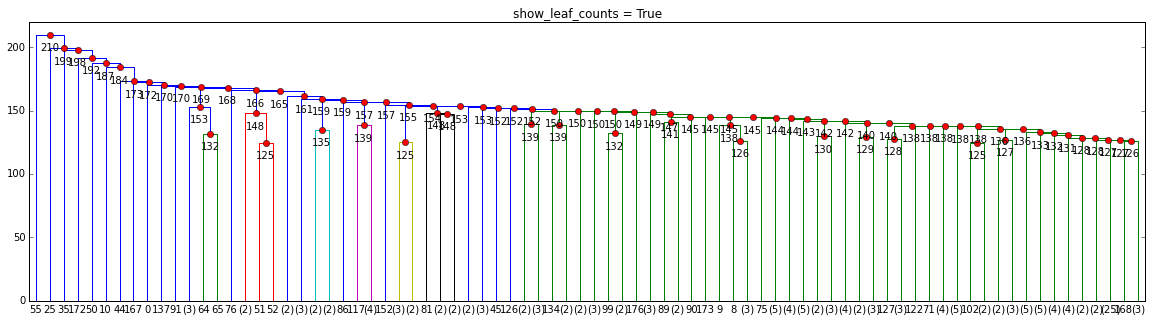

Aggregate Clustering plays using play_Vect


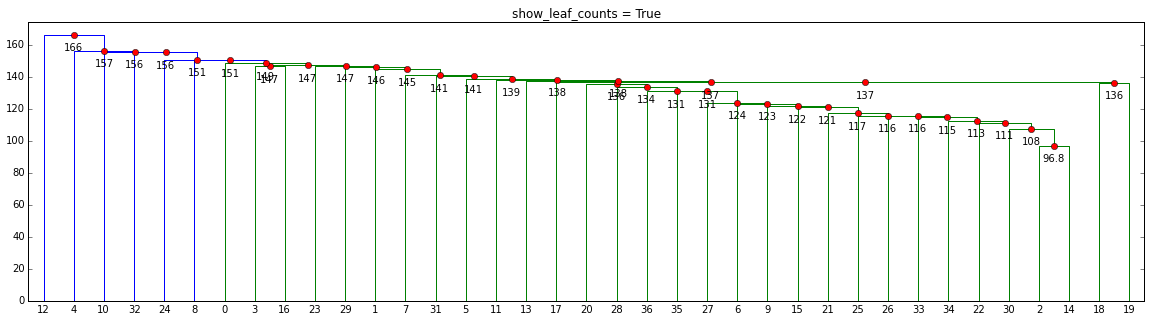

Aggregate Clustering plays using scene_Vect


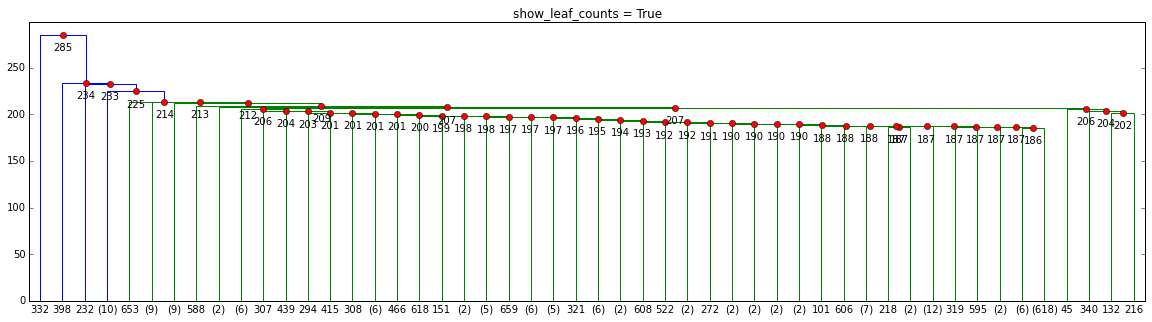

Aggregate Clustering plays using act_Readability


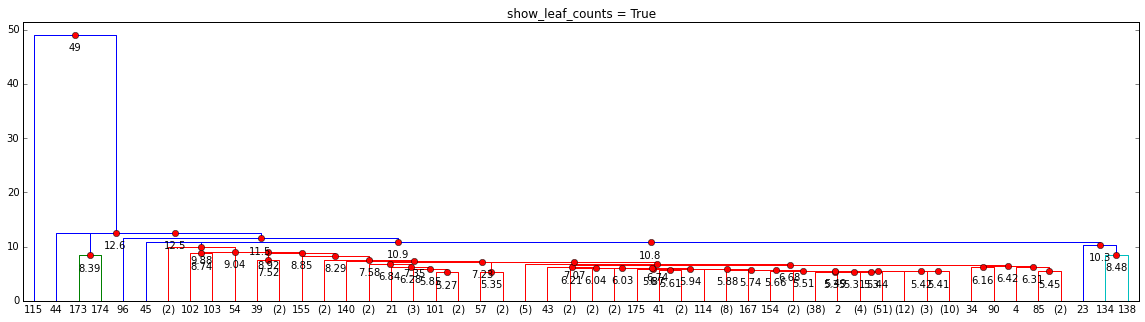

Aggregate Clustering plays using play_Readability


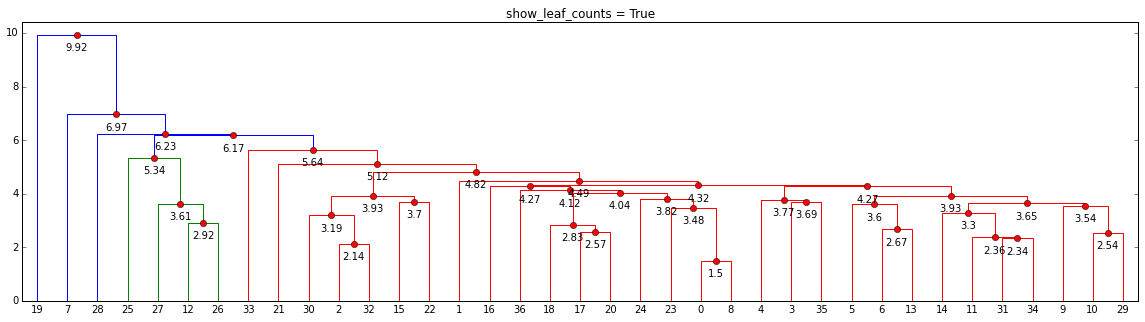

Aggregate Clustering plays using scene_Readability


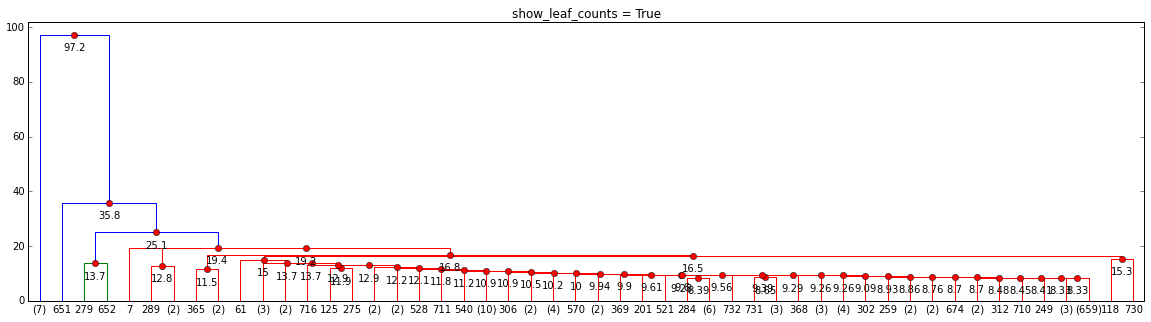

Aggregate Clustering plays using act_TTratio


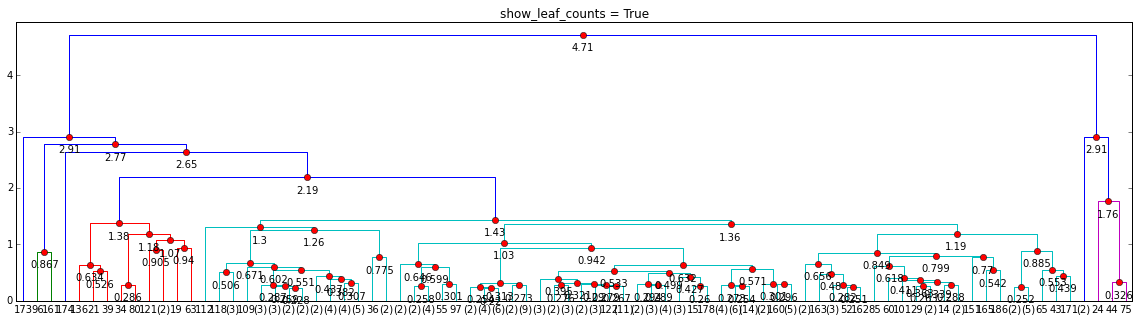

Aggregate Clustering plays using scene_TTratio


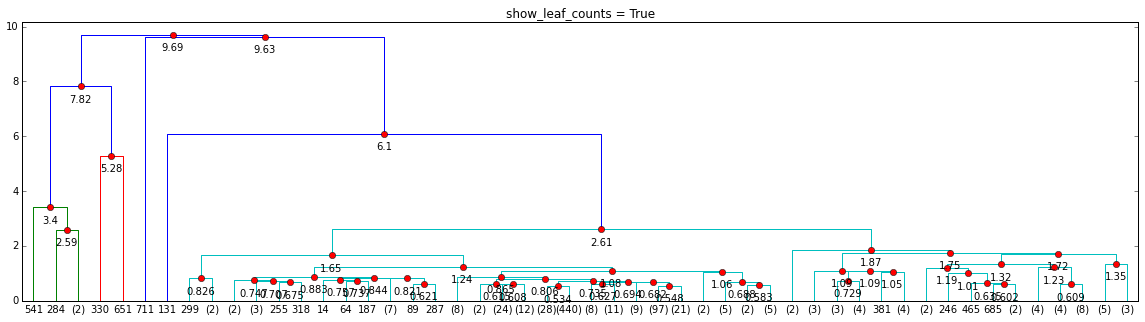

In [3]:
# #import vectorized feature arrays for acts and scenes
act_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllAct_Features_Vectorize.txt',sep=',',header = None)
scene_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
play_Vect = pd.read_csv('VectorizedFeatures/AllComplied/ALLPlay_Features_Vectorize.txt',sep=',',header = None)

# # Import readability features 
act_Readability = pd.read_csv('Readability_Features/Act_Readability_Feature.txt',sep=',',header = None)
play_Readability = pd.read_csv('Readability_Features/Play_Readability_Feature.txt',sep=',',header = None)
scene_Readability = pd.read_csv('Readability_Features/Scene_Readability_Feature.txt',sep=',',header = None)

act_TTratio = pd.read_csv('TypeTokenRatioFeatures/Act_TTratio_.txt',sep=',',header = None)
scene_TTratio = pd.read_csv('TypeTokenRatioFeatures/Scene_TTratio_.txt',sep=',',header = None)


act_Labels = pd.read_csv('LSA_VectorizedFeatures/act_feature_labels.txt',sep='\n',header = None)
scene_Labels= pd.read_csv('LSA_VectorizedFeatures/scene_feature_labels.txt',sep='\n',header = None )
play_Labels= pd.read_csv('LSA_VectorizedFeatures/play_feature_labels.txt',sep='\n',header = None )

data = [act_Vect, play_Vect, scene_Vect,act_Readability,play_Readability,scene_Readability,act_TTratio,scene_TTratio]
titles = ["act_Vect","play_Vect", "scene_Vect","act_Readability","play_Readability","scene_Readability","act_TTratio","scene_TTratio"]
thresholds = [150,150,220,10,6,20,2,6]
ps = [80,80,50,50,80,50,80,50]
dendrogram_data = []
    
# do for all data
for i in range(len(data)):
    data[i] = get_distance(data[i])
    print("Aggregate Clustering plays using", titles[i])
    dendrogram_data.append(calc_dendrogram(data[i],thresholds[i],ps[i]))

### Plays Hierchical Clustering Resutls Analysis
####Outlier groups from the majority of subgroup using Scene_Vectorization feature are the following scenes, the single character
- behind the scene name indicate the color group the scene belongs to
- the first part of king henry the fourth_1.0_1.0 c
- as you like it_3.0_2.0 b
- measure for measure_1.0_1.0 b
- all's well that ends well_2.0_2.0 b
- loves labours lost_4.0_1.0 b
- the second part of king henry the fourth_2.0_2.0 b
- as you like it_1.0_1.0 b
- the merchant of venice_2.0_3.0 b
- the merry wives of windsor_3.0_2.0 g

####Outlier groups from the majority of subgroup using Act_readability feature are the following acts
- behind the act name indicate the color group the act belongs to
- the merry wives of windsor_2.0 b
- the merry wives of windsor_5.0 b
- as you like it_5.0 b
- the comedy of errors_1.0 b
- cymbeline_5.0 g
- as you like it_3.0 g
- measure for measure_4.0 g

####Outlier groups from the majority of subgroup using Scene_readability feature are the following scenes
- much ado about nothing_5.0_3.0 g
- measure for measure_2.0_3.0 r
-much ado about nothing_2.0_1.0 r
- much ado about nothing_5.0_4.0 r
- the merchant of venice_2.0_5.0 r
- all's well that ends well_5.0_2.0 r
- as you like it_4.0_2.0 r
- as you like it_3.0_2.0 r
- cymbeline_5.0_5.0 r
- winter's tale_2.0_1.0 b
- cymbeline_3.0_1.0 b
- as you like it_5.0_3.0 b
- much ado about nothing_5.0_1.0 m
- winter's tale_5.0_2.0 m
- as you like it_1.0_2.0 b
- as you like it_5.0_4.0 b

####Outlier groups from the majority of subgroup using Scene_TTratio are the following scenes
- antony and cleopatra_3.0_13.0 
- winter's tale_2.0_3.0 
- the second part of king henry the fourth_5.0_5.0 
- king lear_5.0_3.0 romeo and juliet_3.0_4.0 
- the merchant of venice_1.0_3.0

####Outlier groups from the majority of subgroup using Act_TTratio are the following scenes
- romeo and juliet_2.0 
- the second part of king henry the fourth_0.0 
- king lear_5.0 
- romeo and juliet_3.0 
- loves labours lost_5.0 
- a midsummer night's dream_5.0 
- twelfth night_5.0

In [69]:
act_TT_outliers = set(["romeo and juliet_2.0","the second part of king henry the fourth_0.0","king lear_5.0_3.0","romeo and juliet_3.0"
,"loves labours lost_5.0","a midsummer night's dream_5.0","twelfth night_5.0"])
scene_TT_outliers = set(["antony and cleopatra_3.0_13.0","winter's tale_2.0_3.0","king lear_5.0","the second part of king henry the fourth_5.0_5.0"
,"king lear_5.0_3.0", "romeo and juliet_3.0_4.0","the merchant of venice_1.0_3.0"])
scene_read_outliers =  set(["much ado about nothing_5.0_3.0","measure for measure_2.0_3.0","much ado about nothing_2.0_1.0","much ado about nothing_5.0_4.0"
,"the merchant of venice_2.0_5.0", "all's well that ends well_5.0_2.0","as you like it_4.0_2.0","as you like it_3.0_2.0",
"much ado about nothing_5.0_1.0","as you like it_5.0_3.0","cymbeline_3.0_1.0","winter's tale_2.0_1.0","cymbeline_5.0_5.0",
"as you like it_5.0_4.0","as you like it_1.0_2.0","winter's tale_5.0_2.0"])
act_read_outliers = set(["measure for measure_4.0","as you like it_3.0","cymbeline_5.0","the comedy of errors_1.0"
,"as you like it_5.0", "the merry wives of windsor_5.0","the merry wives of windsor_2.0"])
scene_vect_outliers = set(["the merry wives of windsor_3.0_2.0","the merchant of venice_2.0_3.0","as you like it_1.0_1.0","tthe second part of king henry the fourth_2.0_2.0"
,"loves labours lost_4.0_1.0", "all's well that ends well_2.0_2.0","measure for measure_1.0_1.0","as you like it_3.0_2.0",
"the first part of king henry the fourth_1.0_1.0"])
res = scene_read_outliers&scene_vect_outliers 
print(res)

{'as you like it_3.0_2.0'}


In [92]:
act_TT_outliers = set(["romeo and juliet","the second part of king henry the fourth","king lear","romeo and juliet"
,"loves labours lost","a midsummer night's dream","twelfth night"])
scene_TT_outliers = set(["antony and cleopatra","winter's tale","king lear","the second part of king henry the fourth"
,"king lear", "romeo and juliet","the merchant of venice"])
scene_read_outliers =  set(["much ado about nothing","measure for measure","much ado about nothing","much ado about nothing"
,"the merchant of venice", "all's well that ends well","as you like it","as you like it",
"much ado about nothing","as you like it","cymbeline","winter's tale","cymbeline",
"as you like it","as you like it","winter's tale"])
act_read_outliers = set(["measure for measure","as you like it","cymbeline","the comedy of errors"
,"as you like it", "the merry wives of windsor","the merry wives of windsor"])
scene_vect_outliers = set(["the merry wives of windsor","the merchant of venice","as you like it","tthe second part of king henry the fourth"
,"loves labours lost", "all's well that ends well","measure for measure","as you like it",
"the first part of king henry the fourth"])
outliers = [act_TT_outliers,scene_TT_outliers,scene_read_outliers,act_read_outliers,scene_vect_outliers]
alloutliers = list(act_TT_outliers | scene_TT_outliers| scene_read_outliers | act_read_outliers |scene_vect_outliers)

In [78]:
print(len(scene_read_outliers))

7


In [80]:
act_TT_outliers = ["romeo and juliet","the second part of king henry the fourth","king lear","romeo and juliet"
,"loves labours lost","a midsummer night's dream","twelfth night"]
scene_TT_outliers = ["antony and cleopatra","winter's tale","king lear","the second part of king henry the fourth"
,"king lear", "romeo and juliet","the merchant of venice"]
scene_read_outliers =  ["much ado about nothing","measure for measure","much ado about nothing","much ado about nothing"
,"the merchant of venice", "all's well that ends well","as you like it","as you like it",
"much ado about nothing","as you like it","cymbeline","winter's tale","cymbeline",
"as you like it","as you like it","winter's tale"]
act_read_outliers = ["measure for measure","as you like it","cymbeline","the comedy of errors"
,"as you like it", "the merry wives of windsor","the merry wives of windsor"]
scene_vect_outliers = ["the merry wives of windsor","the merchant of venice","as you like it","tthe second part of king henry the fourth"
,"loves labours lost", "all's well that ends well","measure for measure","as you like it",
"the first part of king henry the fourth"]

In [103]:
for i in range(len(alloutliers)):
    count = 0 
    for j in range(len(outliers)):

        count = count + list(outliers[j]).count(alloutliers[i])
    print(alloutliers[i] + " appears " + str(count) + " times")


romeo and juliet appears 2 times
winter's tale appears 2 times
the merchant of venice appears 3 times
antony and cleopatra appears 1 times
the second part of king henry the fourth appears 2 times
twelfth night appears 1 times
the first part of king henry the fourth appears 1 times
all's well that ends well appears 2 times
tthe second part of king henry the fourth appears 1 times
as you like it appears 3 times
the merry wives of windsor appears 2 times
measure for measure appears 3 times
the comedy of errors appears 1 times
king lear appears 2 times
loves labours lost appears 2 times
a midsummer night's dream appears 1 times
much ado about nothing appears 1 times
cymbeline appears 2 times


## Analaysis
We can see that the following plays have multiple scenes or acts whose readability, Type Token ratio or vectorization featues
are different than the majorities
- as you like it appears 3 times
- the merchant of venice appears 3 times
- measure for measure appears 3 times

- romeo and juliet appears 2 times
- winter's tale appears 2 times
- the second part of king henry the fourth appears 2 times
- all's well that ends well appears 2 times
- the merry wives of windsor appears 2 times
- king lear appears 2 times
- loves labours lost appears 2 times
-  cymbeline appears 2 times

In [83]:
act_TT_outliers.count("romeo and julie")

0

Next we apply the Hierachical Clustering to the vectorized features extracted from Shakespear's poems

Aggregate Clustering poems using poem_Vect


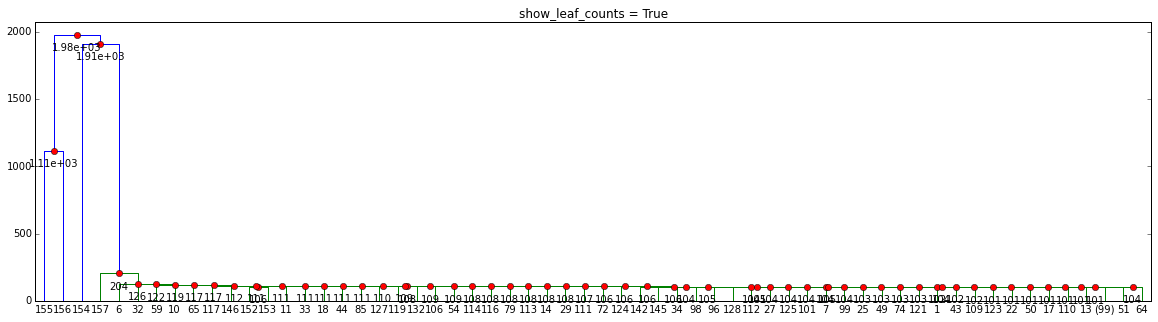

Aggregate Clustering poems using poem_2gram


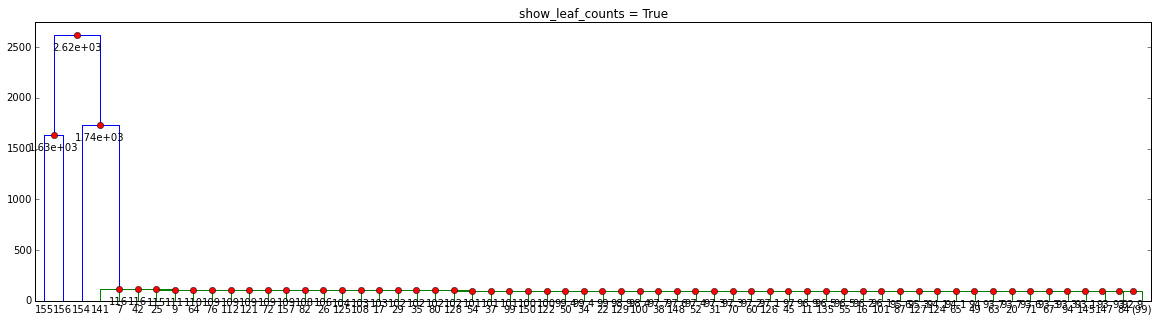

Aggregate Clustering poems using poem_4gram


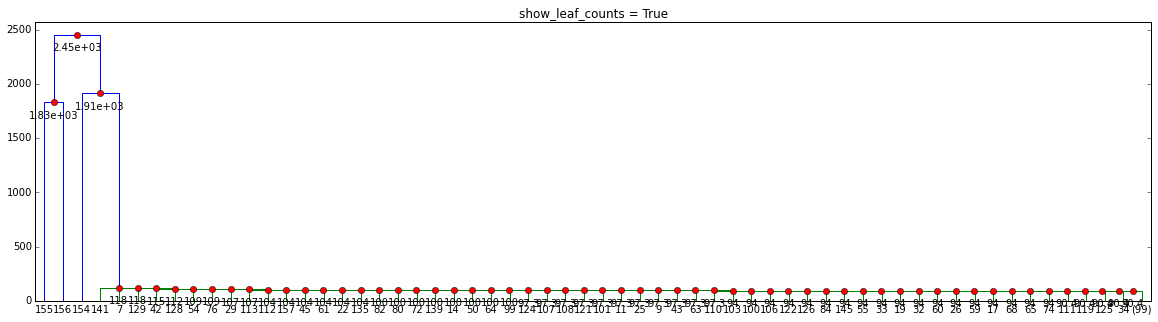

In [4]:
## Aggregate Clustering plays

# #import vectorized feature arrays for acts and scenes
poem_Vect = pd.read_csv('Poems/Poem_Features_Vectorize.txt',sep=',',header = None)
poem_2gram = pd.read_csv('Poems/Poem_Features_ngram2.txt',sep=',',header = None)
poem_4gram = pd.read_csv('Poems/Poem_Features_ngram4.txt',sep=',',header = None)

# # Import readability features 
# act_Readability = pd.read_csv('Readability_Features/Act_Readability_Feature.txt',sep=',',header = None)
# play_Readability = pd.read_csv('Readability_Features/Play_Readability_Feature.txt',sep=',',header = None)
# scene_Readability = pd.read_csv('Readability_Features/Scene_Readability_Feature.txt',sep=',',header = None)



data = [poem_Vect, poem_2gram, poem_4gram]
titles = ["poem_Vect","poem_2gram", "poem_4gram",]
thresholds = [500,500,500]
ps = [60,60,60]
poems_dendrogram = []
    
# do for all data
for i in range(len(data)):
    data[i] = get_distance(data[i])
    print("Aggregate Clustering poems using", titles[i])
    poems_dendrogram.append(calc_dendrogram(data[i],thresholds[i],ps[i]))

### The following poems # 154, # 155,# 156, and # 157 from their own subgroup
### and using n-grams features we got the same above results
Refering to the labels of the poems, those outliers poems are the followings:
- sonnet cliv
- a lover's complaint
- the rape of lucrece
- venus and adonis
